In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_context('poster')
sns.set(font_scale=1)

In [3]:
df_roads = pd.read_csv('./data/Road_Transport_BRS_2017-18_Annexure7_9c.csv')
rows_to_drop = df_roads[df_roads['Name of the States'] == 'INDIA (1) ++'].index
df_roads.drop(rows_to_drop, inplace=True)
df_roads.head()

,Name of the States,National Highways,State Highways,District Roads,Rural Roads,Urban Roads,Project Roads,Total road Length,Total Population,Road length per '000 pop,Road length per '000 Population - National Highways,Road length per '000 Population - State Highways,Road length per '000 Population - District Roads,Road length per '000 Population - Rural Roads,Road length per '000 Population - Urban roads,Road length per '000 Population - Project Roads
0,Andhra Pradesh,10207,15753,58083,217892,34878,9447,346260,84581,4.09,0.12,0.19,0.69,2.58,0.41,0.11
1,Arunachal Pradesh,2537,13500,8731,20807,56,4924,50555,1384,36.54,1.83,9.76,6.31,15.04,0.04,3.56
2,Assam,3909,2530,6093,303672,5603,21803,343609,31206,11.01,0.13,0.08,0.20,9.73,0.18,0.70
3,Bihar,4877,4006,11145,258800,9184,2559,290571,104099,2.79,0.05,0.04,0.11,2.49,0.09,0.02
4,Chhattisgarh,3592,4176,11965,54308,12765,15772,102578,25545,4.02,0.14,0.16,0.47,2.13,0.50,0.62


In [4]:
cmap = plt.cm.get_cmap('YlGnBu')

import matplotlib.colors as colors
import matplotlib.colors as mcolors
base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette1 = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)


color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 11)]

# Use the ListedColormap function to create a bipolar sequential palette
palette2 = colors.ListedColormap(colors_list, name='bipolar')

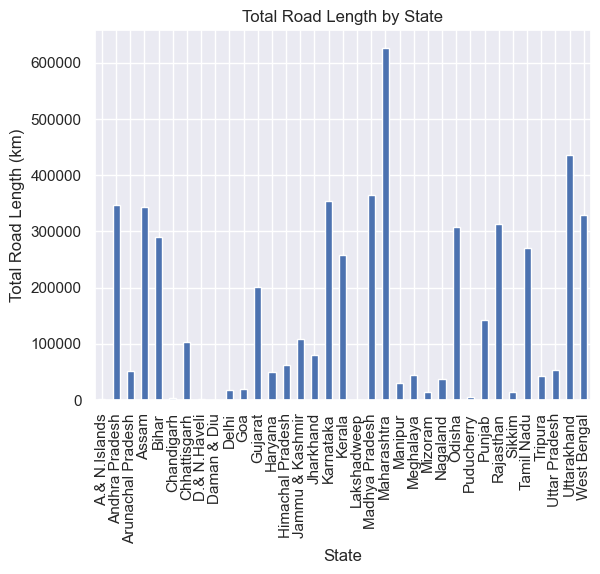

In [5]:
grouped = df_roads.groupby('Name of the States')['Total road Length'].sum()

# Create a bar chart of the total road length by state
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax)
ax.set_xlabel('State')
ax.set_ylabel('Total Road Length (km)')
ax.set_title('Total Road Length by State')
plt.show()

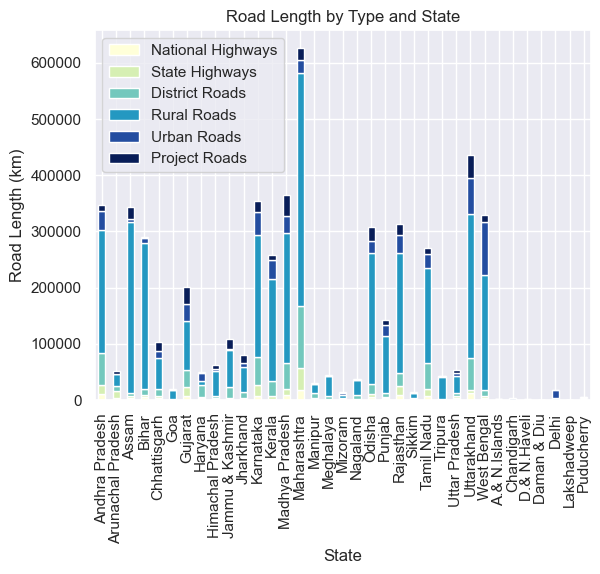

In [6]:
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=cmap)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()

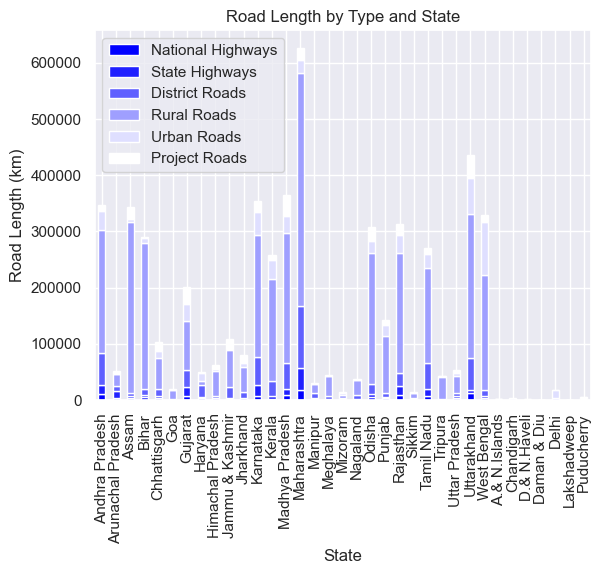

In [7]:
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=palette1)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()

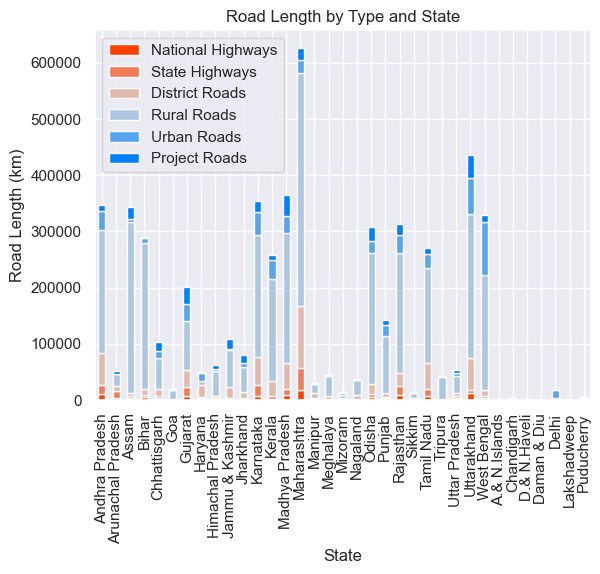

In [8]:
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=palette2)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()